# Lecture 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import data, img_as_ubyte
from skimage.exposure import histogram
from skimage.util import random_noise
import pywt

In [2]:
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=[16,8]

In [3]:
I = data.camera()

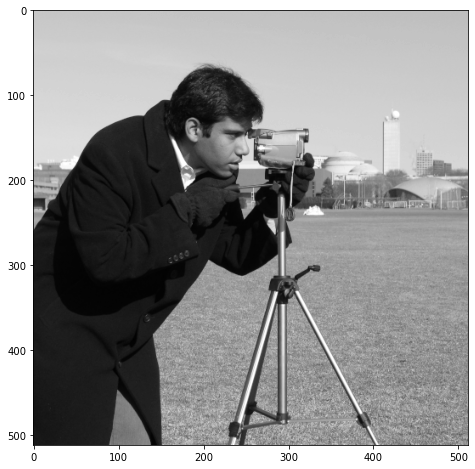

In [4]:
plt.imshow(I);

### 1D discrete wavelet transform

In [5]:
s = I[400,:]

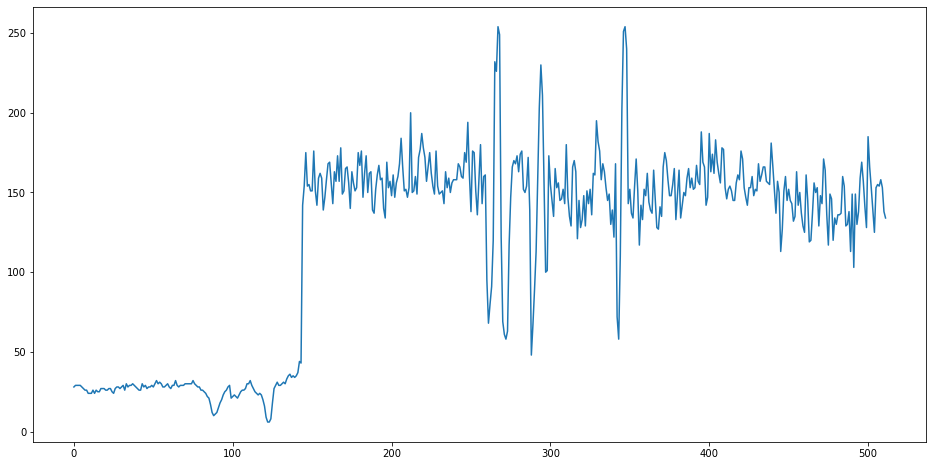

In [6]:
plt.plot(s);

In [7]:
coef = pywt.wavedec(s,'haar',level=2)

In [8]:
type(coef)

list

In [9]:
len(coef)

3

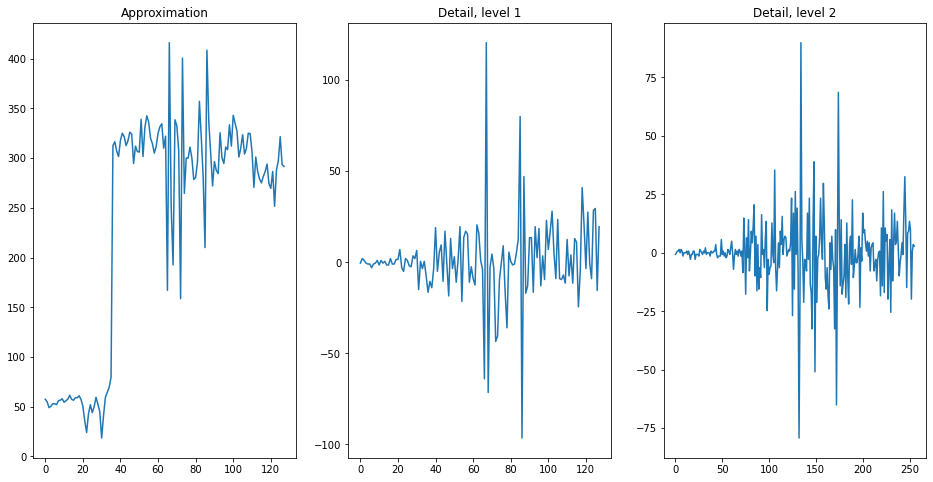

In [10]:
plt.subplot(131)
plt.plot(coef[0])
plt.title('Approximation')
plt.subplot(132)
plt.plot(coef[1])
plt.title('Detail, level 1')
plt.subplot(133)
plt.plot(coef[2])
plt.title('Detail, level 2');

In [11]:
r = pywt.waverec(coef,'haar')

In [12]:
np.mean(abs(r-s))

2.7172708527700706e-14

### 2D wavelet transform

In [13]:
coef = pywt.wavedec2(I,'db4',level=2)

In [14]:
arr,ind = pywt.coeffs_to_array(coef)

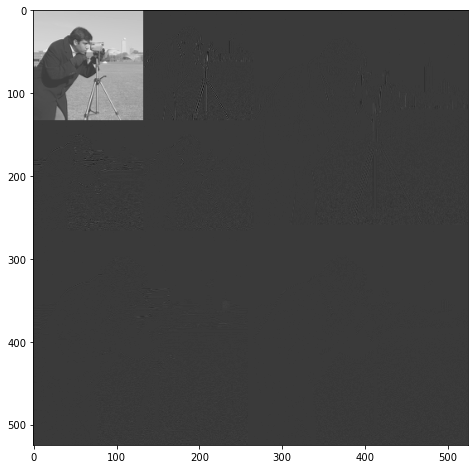

In [15]:
plt.imshow(arr);

In [16]:
ind

[(slice(None, 133, None), slice(None, 133, None)),
 {'ad': (slice(None, 133, None), slice(133, 266, None)),
  'da': (slice(133, 266, None), slice(None, 133, None)),
  'dd': (slice(133, 266, None), slice(133, 266, None))},
 {'ad': (slice(None, 259, None), slice(266, 525, None)),
  'da': (slice(266, 525, None), slice(None, 259, None)),
  'dd': (slice(266, 525, None), slice(266, 525, None))}]

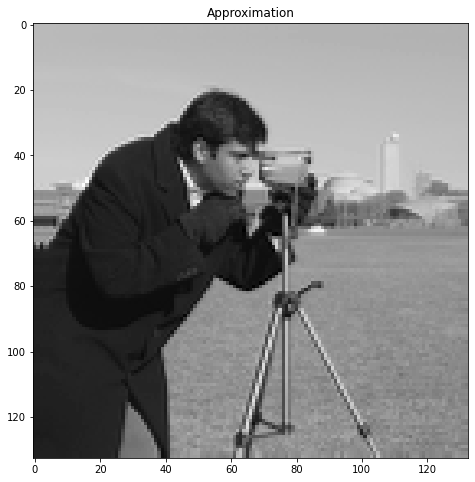

In [17]:
plt.imshow(arr[ind[0]])
plt.title('Approximation');

In [18]:
ind[2]

{'ad': (slice(None, 259, None), slice(266, 525, None)),
 'da': (slice(266, 525, None), slice(None, 259, None)),
 'dd': (slice(266, 525, None), slice(266, 525, None))}

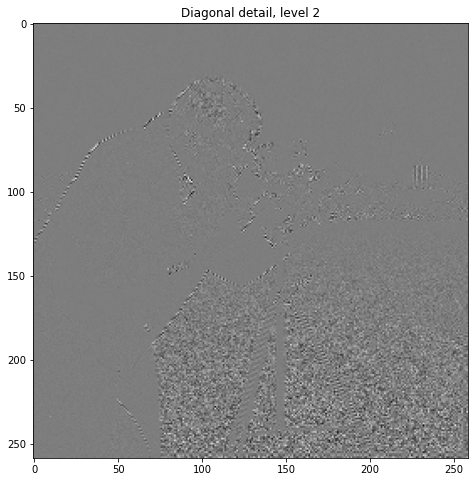

In [19]:
plt.imshow(arr[ind[2]['dd']])
plt.title('Diagonal detail, level 2');

In [20]:
h, x = histogram(arr[ind[2]['dd']])

<BarContainer object of 256 artists>

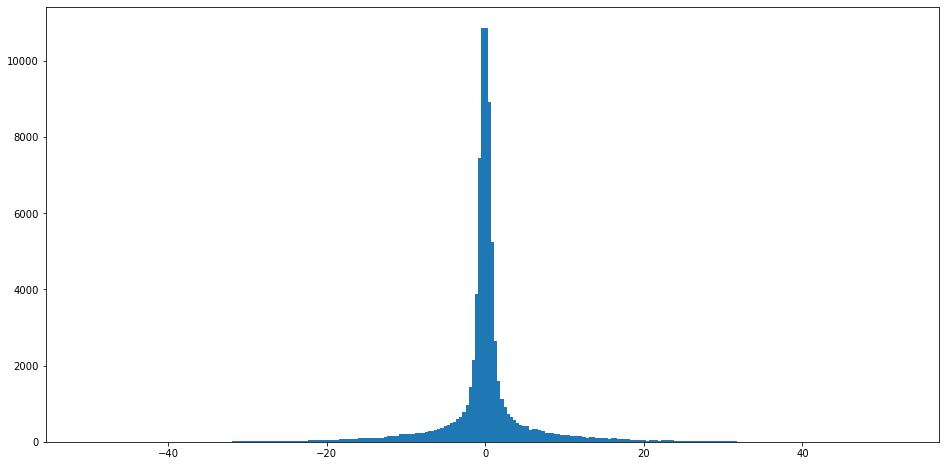

In [21]:
plt.bar(x,h)

### High-pass filtering

In [22]:
arr[ind[0]]=0

In [23]:
coef = pywt.array_to_coeffs(arr,ind,'wavedec2')

In [24]:
K = pywt.waverec2(coef,'db4')

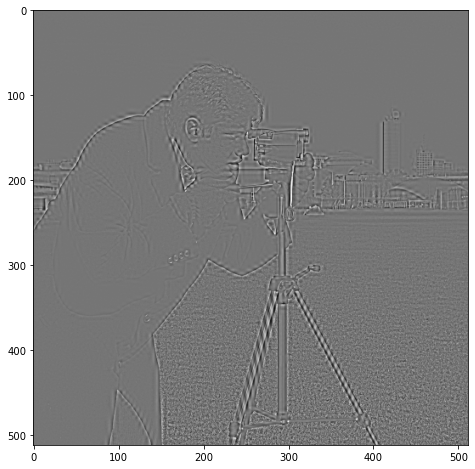

In [25]:
plt.imshow(K)

### Wavelet based noise removal

In [26]:
J = img_as_ubyte(random_noise(I,var=0.004))

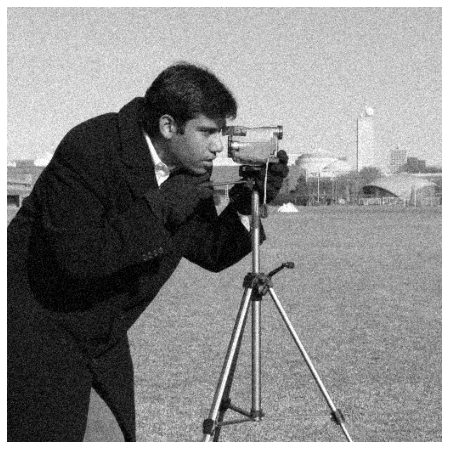

In [27]:
plt.imshow(J).axes.set_axis_off()

In [28]:
coef=pywt.wavedec2(J,'db4',level=2)

In [29]:
arr,ind = pywt.coeffs_to_array(coef)

In [30]:
for i in range(2):
    for j in ('ad','da','dd'):
        C = arr[ind[i+1][j]]
        t = 2*C.std()
        C[abs(C)<t] = 0
        arr[ind[i+1][j]] = C

In [31]:
coef = pywt.array_to_coeffs(arr,ind,'wavedec2')
K = pywt.waverec2(coef,'db4')

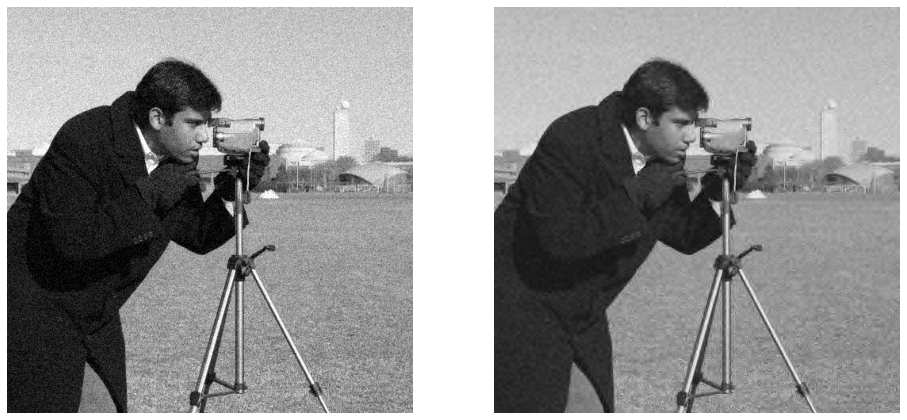

In [32]:
plt.subplot(121)
plt.imshow(J).axes.set_axis_off()
plt.subplot(122)
plt.imshow(K).axes.set_axis_off()

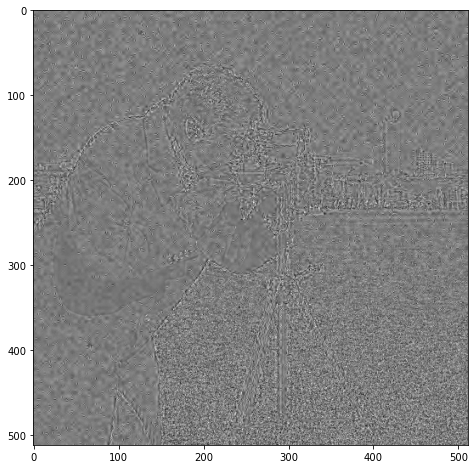

In [33]:
plt.imshow(I-K)

In [34]:
(I-K).std()

10.922199879200978

In [35]:
(I+0.0-J).std()

15.750456015792256